<a href="https://colab.research.google.com/github/FelipeAmorimReis/Notebook-Colab-Dataset-ML/blob/main/Classificacao_Cancer_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP: Dataset do Câncer de *Mama*
###Carregamento e exploração inicial do dataset relacionado ao câncer de mama, onde haverá o retorno do diagnostico.

In [6]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset
Carregamento e Exploração Inicial do Dataset:
<br>

Descrição: <br>

* Carregamento do dataset relacionado ao câncer de mama.
* Transformação do diagnóstico para valores numéricos: Benigno (B) = 0, Maligno (M) = 1.
* Reorganização das colunas, movendo 'diagnosis' para o final.
Visualização das primeiras linhas do dataset.

<br>

Propósito:
* Preparação inicial do conjunto de dados para análise e modelagem.

In [22]:
import pandas as pd

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/CancerDiagnosis-ML/Backend-Machine-Learning-Cancer-Detection/main/CSV/breast-cancer-wisconsin-data/data.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

 # Alterando retorno, onde: Beligno: 0 | Maligno: 1
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1})

# Selecionando apenas as colunas essenciais
colunas_especificas = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
               'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
               'fractal_dimension_mean', 'diagnosis']

dataset = dataset[colunas_especificas]

# Mostra as primeiras linhas do dataset
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1



## Separação em conjunto de treino e conjunto de teste com holdout

Descrição:

* Definição do tamanho do conjunto de teste (20% do dataset).
* Utilização de uma semente aleatória para garantir reproducibilidade.
* Separação dos conjuntos de treino e teste utilizando a técnica de holdout com estratificação.
* Parâmetros e configurações para a validação cruzada com estratificação.

<br>
Propósito:

* Divisão dos dados em conjuntos de treino e teste para treinamento e avaliação dos modelos.

In [25]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:10]
y = array[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência


# Avaliação de Modelos:

Descrição:

* Definição de uma semente global para garantir a reprodutibilidade.
* Criação de modelos de classificação, incluindo KNN, Decision Tree, Naive Bayes e SVM.
* Avaliação dos modelos por meio da validação cruzada com estratificação.
* Exibição de um boxplot comparativo dos desempenhos dos modelos.

<br>
Propósito:

* Análise comparativa inicial dos modelos em termos de acurácia.

KNN: 0.888213 (0.051378)
CART: 0.938551 (0.034801)
NB: 0.918744 (0.033889)
SVM: 0.888019 (0.029687)


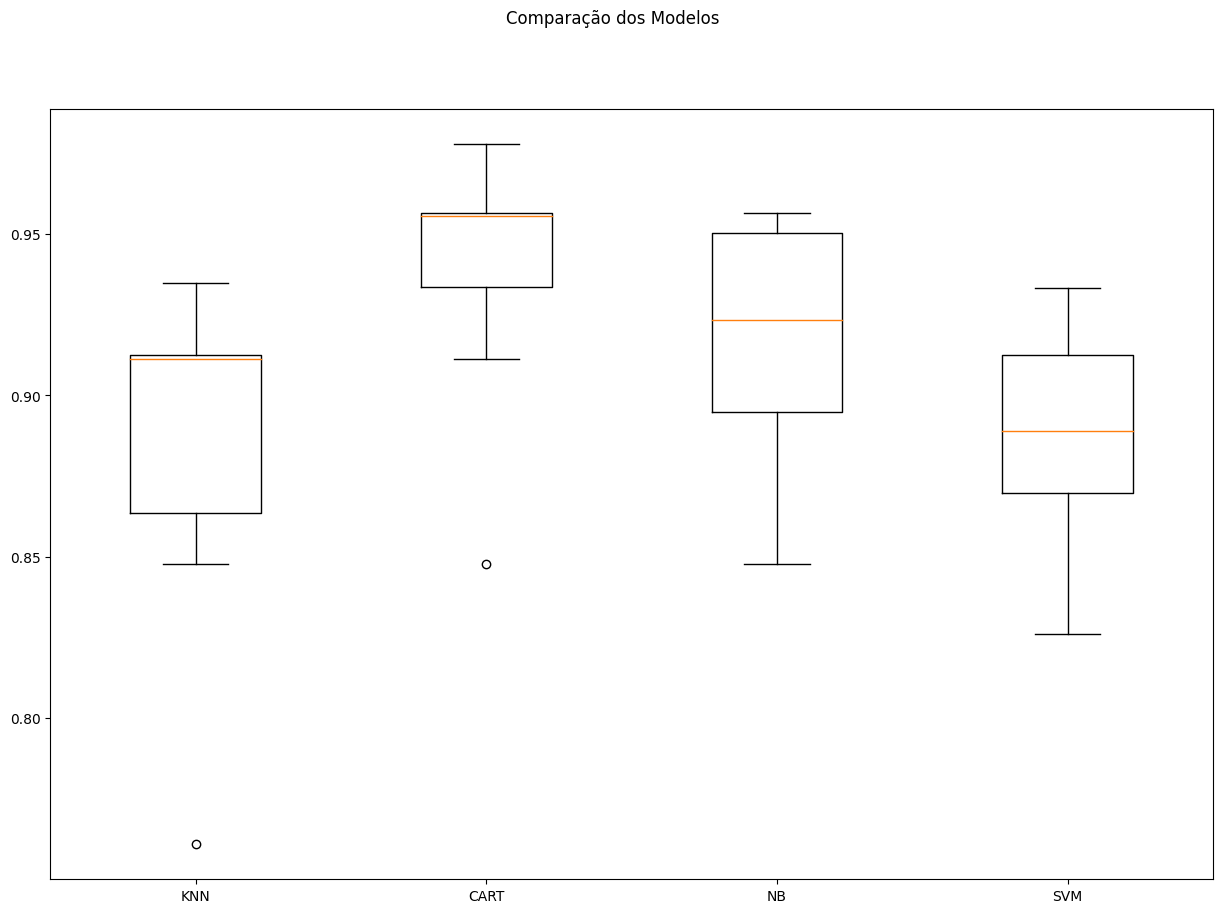

In [26]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados


Descrição:

* Definição de uma semente global para garantir a reprodutibilidade.
* Criação de pipelines para cada algoritmo de classificação, aplicando diferentes transformações nos dados.
* Algoritmos utilizados: KNN, Árvore de Classificação, Naive Bayes e SVM.
* Transformações aplicadas: Original, Padronizado (StandardScaler) e Normalizado (MinMaxScaler).
* Avaliação dos modelos por meio da validação cruzada com estratificação.
* Exibição de um boxplot comparativo dos desempenhos dos modelos.

<br>
Propósito:

* Analisar o impacto das transformações de dados nos modelos de classificação, permitindo a escolha da abordagem mais adequada.

KNN-orig: 0.888 (0.051)
CART-orig: 0.939 (0.035)
NB-orig: 0.919 (0.034)
SVM-orig: 0.888 (0.030)
KNN-padr: 0.943 (0.040)
CART-padr: 0.923 (0.033)
NB-padr: 0.919 (0.032)
SVM-padr: 0.950 (0.034)
KNN-norm: 0.950 (0.036)
CART-norm: 0.932 (0.031)
NB-norm: 0.919 (0.032)
SVM-norm: 0.950 (0.035)


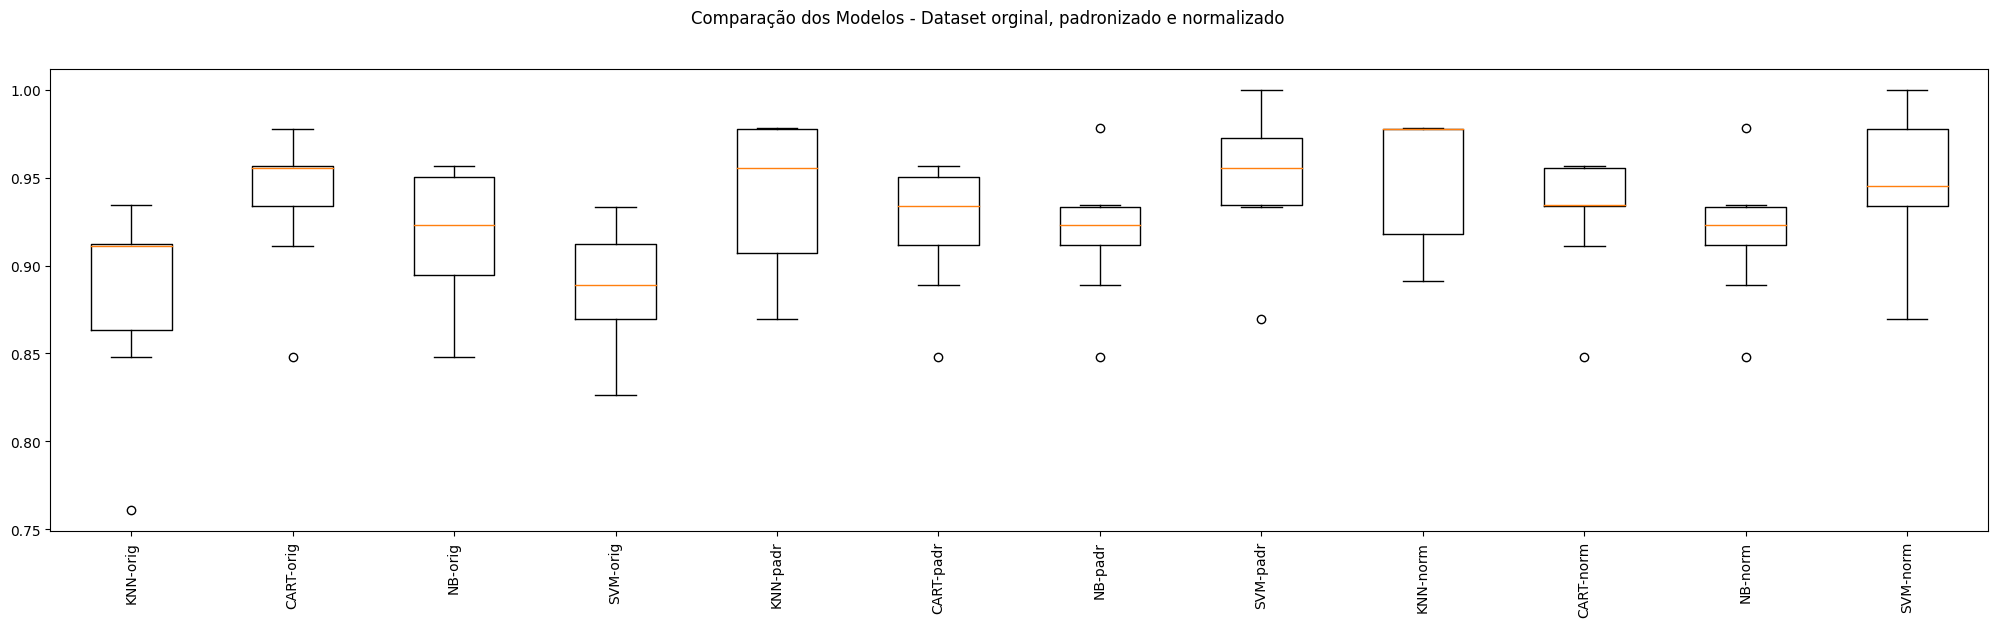

In [27]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

Descrição:

* Definição de uma semente global para garantir a reprodutibilidade.
* Criação de pipelines para o KNN considerando diferentes transformações nos dados: Original, Padronizado (StandardScaler) e Normalizado (MinMaxScaler).
* Especificação de um conjunto de hiperparâmetros a serem avaliados por meio do GridSearchCV.
* Avaliação dos modelos com validação cruzada e busca pelos melhores hiperparâmetros.
* Exibição da melhor configuração encontrada para cada abordagem de dados.

<br>

Propósito:

* Otimizar os hiperparâmetros do KNN para melhorar seu desempenho, considerando diferentes transformações de dados.


In [28]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.898986 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Sem tratamento de missings: knn-padr - Melhor: 0.949614 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
Sem tratamento de missings: knn-norm - Melhor: 0.949662 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}


## Finalização do Modelo

Descrição:

* Padronização do conjunto de treino usando o scaler ajustado a esse conjunto.
* Treinamento do modelo KNN com os hiperparâmetros otimizados (manhattan distance, 17 vizinhos).
* Padronização do conjunto de teste utilizando o mesmo scaler.
* Predição das classes no conjunto de teste e cálculo da acurácia.

<br>
Propósito:

* Avaliar o desempenho do modelo KNN otimizado utilizando o conjunto de testes.

In [29]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=17)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9122807017543859


In [30]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

## Simulando a aplicação do modelo em dados não vistos

In [31]:
# Novos dados - não sabemos a classe!
data_entrada = {
    'id': [800, 801, 802],
    'radius_mean': [10, 25, 3],
    'texture_mean': [5, 30, 3],
    'perimeter_mean': [50, 150, 3],
    'area_mean': [200, 1500, 3],
    'smoothness_mean': [0.1, 0.2, 3],
    'compactness_mean': [0.05, 0.3, 3],
    'concavity_mean': [0.1, 0.4, 3],
    'concave points_mean': [0.05, 0.2, 3],
    'symmetry_mean': [0.1, 0.3, 3],
    'fractal_dimension_mean': [0.05, 0.2, 3]
}

# Seleciona apenas os 10 primeiros atributos
atributos_entrada = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                     'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']

entrada_novos_dados = pd.DataFrame(data_entrada, columns=atributos_entrada)

# Converte os dados para um array
array_entrada = entrada_novos_dados.values

# Seleciona apenas os 10 primeiros atributos
X_entrada = array_entrada[:, 0:10].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 2.23199006e+02 -2.16176357e+00 -3.58227190e+00 -1.72036668e+00
   1.42262309e+04 -8.22680724e-02 -4.87124289e-01  1.31757865e+00
  -4.78864538e+00  5.27382592e+00]
 [ 2.23483020e+02  1.32883712e+00 -2.55251689e+00 -1.43595642e+00
   1.06741305e+05  1.81287987e+00  2.65161849e+00  9.05577335e+00
   6.87769722e-01  3.36259071e+01]
 [ 2.23767034e+02 -3.79071055e+00 -3.66465230e+00 -1.85403950e+00
   2.06638804e+02  5.48770222e+01  3.65500405e+01  7.61201274e+01
   1.02914185e+02  4.16379003e+02]]


In [32]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 1.]


In [33]:
import pickle
pickle_out = open('cancer_mama_lr.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [34]:
import pickle
pickle_in = open('cancer_mama_lr.pkl', 'rb')
modelo = pickle.load(pickle_in)
pickle_in.close()

saidas = modelo.predict(rescaledEntradaX)
print(saidas)

pkl_results = modelo.score(X_test, y_test)
print('Pickle:', pkl_results)

[0. 1. 1.]
Pickle: 0.3684210526315789
